<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/SpaceShipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/train.csv', index_col='PassengerId')
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **STAGE 1: DATA EXPLORATION:**

In [ ]:
df.shape

(8693, 13)

In [ ]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df['HomePlanet'].nunique()

3

In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
df['Cabin'].nunique()

6560

In [ ]:
df = df.dropna()

# **STAGE 2: PLOTTING**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

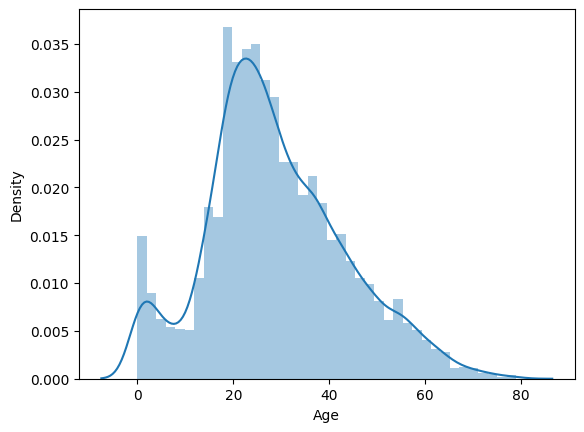

In [ ]:
sns.distplot(df['Age']);

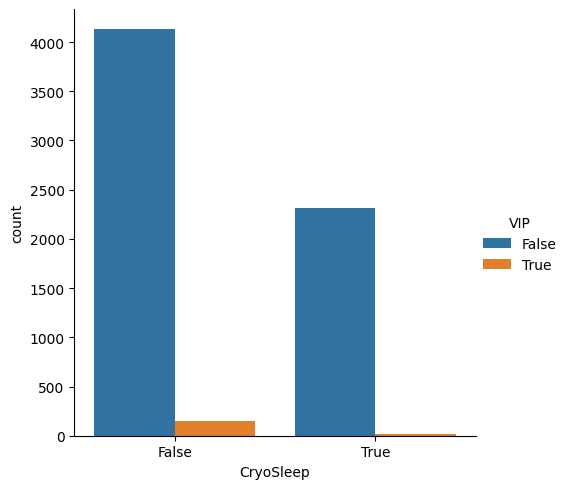

In [ ]:
sns.catplot(data=df, x='CryoSleep', hue='VIP', kind='count');

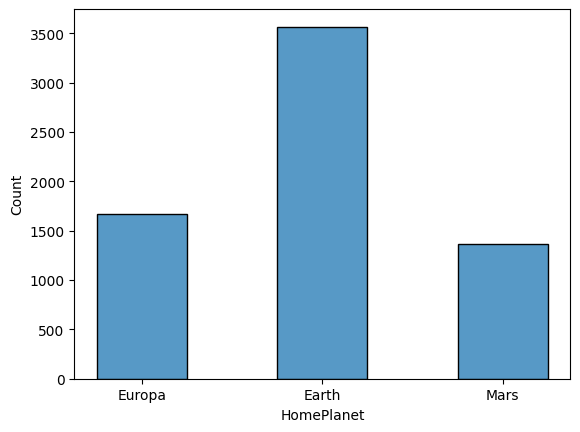

In [ ]:
sns.histplot(df['HomePlanet'], shrink=0.5);

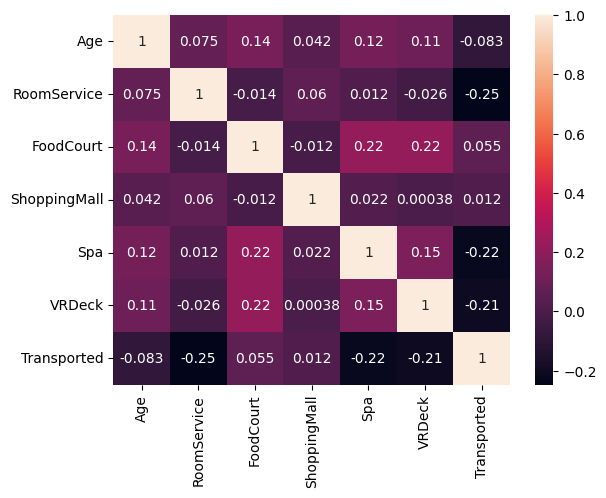

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True);

# **STAGE 3: DATA PREPROCESSING**

In [ ]:
df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
import sklearn.preprocessing as sp

In [ ]:
df = df.drop(['Cabin', 'Name'], axis=1)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
le = sp.LabelEncoder()
le.fit(df['HomePlanet'].drop_duplicates())
df['HomePlanet'] = le.transform(df['HomePlanet'])

le.fit(df['CryoSleep'].drop_duplicates())
df['CryoSleep'] = le.transform(df['CryoSleep'])

le.fit(df['Destination'].drop_duplicates())
df['Destination'] = le.transform(df['Destination'])

le.fit(df['VIP'].drop_duplicates())
df['VIP'] = le.transform(df['VIP'])

le.fit(df['Transported'].drop_duplicates())
df['Transported'] = le.transform(df['Transported'])

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [ ]:
df['HomePlanet'].value_counts()

0    3566
1    1673
2    1367
Name: HomePlanet, dtype: int64

In [ ]:
df.shape

(6606, 11)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [ ]:
for i in df.columns:
  df[i] = df[i].apply(int)

In [ ]:
X_train = df.drop('Transported', axis=1)
y_train = df['Transported']

In [ ]:
X_train.shape, y_train.shape

((6606, 10), (6606,))

In [ ]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,
0001_01,1,0,2,39,0,0,0,0,0,0
0002_01,0,0,2,24,0,109,9,25,549,44
0003_01,1,0,2,58,1,43,3576,0,6715,49
0003_02,1,0,2,33,0,0,1283,371,3329,193
0004_01,0,0,2,16,0,303,70,151,565,2


# **STAGE 4: MODEL FITTNG**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': range(5, 30, 2),
    'min_samples_split': range(1, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': range(1, 10)
}

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [ ]:
grid.best_score_

0.7824729351646452

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [ ]:
clf = grid.best_estimator_

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=4)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression?

In [ ]:
clf1 = LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
clf1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

# **STAGE 5: TEST DATA PREPROCESSIG**

In [ ]:
X_test = pd.read_csv('/content/sample_data/test.csv', index_col='PassengerId')

In [ ]:
X_test = X_test.dropna()

In [ ]:
X_test = X_test.drop(['Cabin', 'Name'], axis=1)

In [ ]:
X_test = pd.get_dummies(X_test)

In [ ]:
le.fit(X_test['HomePlanet'].drop_duplicates())
X_test['HomePlanet'] = le.transform(X_test['HomePlanet'])

le.fit(X_test['CryoSleep'].drop_duplicates())
X_test['CryoSleep'] = le.transform(X_test['CryoSleep'])

le.fit(X_test['Destination'].drop_duplicates())
X_test['Destination'] = le.transform(X_test['Destination'])

le.fit(X_test['VIP'].drop_duplicates())
X_test['VIP'] = le.transform(X_test['VIP'])

# **STAGE 6: PREDICT**

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# I know it sucks... But i did all i could😔

In [ ]:
# One day I'll update it